##### Python for High School (Winter 2022)

* [Table of Contents](PY4HS.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/Py4HS_Bernoulli.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/Py4HS_Bernoulli.ipynb)

# Polynomials with Bernoulli Numbers

This Notebook was developed after our Summer 2022 virtual classroom, a not for credit enrichment experience.  Earlier in 2022, I served as an 8th grade teacher in a for-credit program, for 1.5 semesters.

As of that time, I had not yet done much with Taylor and Maclaurin Expansions, in terms of Notebooks.  Other teachers were going there for sure.  

I was aiming for some more exotic and/or esoteric topics (this being summer school enrichment), i.e. material non-redundant with topics ordinarily included in a typical college prep high school curriculum, in that day and age.

An historical approach based on the Bernoulli family as a hub, based in Switzerland, came to me later.  I started exploring the ramifications by leveraging Bernoulli numbers as a topic, which connect us back to Pascal's Triangle, already a "grand central station" in our global grid.

These explorations came in conjunction with a certain [Math for Wisdom (M4W)](https://www.math4wisdom.com/) project, managed by one Andrius Kulikauskas in Lithuania.

In [1]:
import sympy as sp
import numpy as np
import pandas as pd

In [2]:
from IPython.display import YouTubeVideo

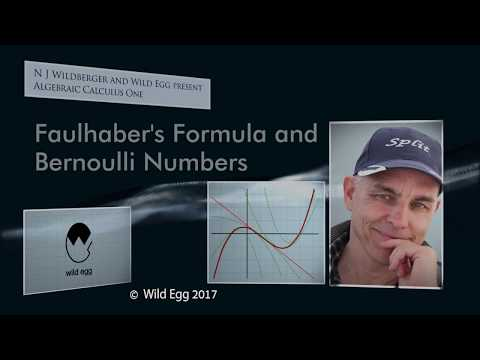

In [3]:
YouTubeVideo("jx_JR5xD9Ko")

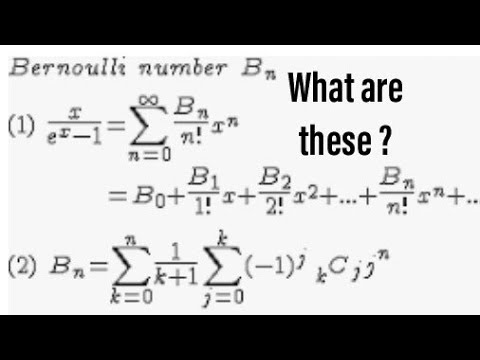

In [4]:
YouTubeVideo("s6-lN62Q_z8")

In [5]:
m = 3    # n = 10
(   1 ** m 
 +  2 ** m 
 +  3 ** m 
 +  4 ** m 
 +  5 ** m 
 +  6 ** m 
 +  7 ** m 
 +  8 ** m 
 +  9 ** m  
 + 10 ** m)

3025

In [6]:
m, n, i = sp.symbols(['m','n', 'i'])

In [7]:
the_sum = sp.summation(i ** m, (i, 1, n))
the_sum

Sum(i**m, (i, 1, n))

In [8]:
the_sum.evalf(subs={n:10, m:3})

3025.00000000000

In [9]:
def exp_sum(m, n):
    terms = np.arange(1, n+1)
    return np.sum(terms**m)

In [10]:
exp_sum(3, 10)

3025

In [11]:
exp_sum(5, 10)

220825

In [12]:
n = 20
Bs = [sp.bernoulli(i) for i in range(0, n+1)]

In [13]:
Bernoulli = pd.DataFrame({'Bernoulli':Bs})
Bernoulli

,Bernoulli
0,1
1,-1/2
2,1/6
3,0
4,-1/30
5,0
6,1/42
7,0
8,-1/30
9,0


In [14]:
from scipy.special import comb

def exp_sum_2(m, n):
    n = n + 1
    total = 0
    for k in range(0, m+1):
        term = comb(m+1, k, exact=True) * sp.bernoulli(k) * n**(m-k+1)
        total += term
    return total/(m+1)

In [15]:
exp_sum_2(3, 10)

3025

In [16]:
exp_sum(3, 10)

3025

In [17]:
exp_sum_2(5, 10)

220825

In [18]:
exp_sum(5, 10)

220825

# Bernoulli Polynomials

The section above followed an well trod path, whereas I'm more randomly exploring in the cells below.  As I discuss in one of my YouTubes, my objective is to be suggestive, and to demonstrate the relevance of a particular toolset, namely Jupyter + pandas + sympy + numpy.  In past chapters, I did a lot more with VPython, and lets not forget Blender.  In this Python for High School implementation, I dive into Python + POV-Ray quite a bit, a theme for me since the 1990s.

See: [CP4E; Numeracy Series](http://4dsolutions.net/ocn/numeracy0.html)

In [19]:
t, x = sp.symbols(['t', 'x'])

In [20]:
t = 2
f = t * sp.E**(x*t)/(sp.E**t - 1)
f

2*exp(2*x)/(-1 + exp(2))

In [21]:
f.evalf()

0.313035285499331*exp(2*x)

In [22]:
domain = np.linspace(2, 5, 40)
domain

array([2.        , 2.07692308, 2.15384615, 2.23076923, 2.30769231,
       2.38461538, 2.46153846, 2.53846154, 2.61538462, 2.69230769,
       2.76923077, 2.84615385, 2.92307692, 3.        , 3.07692308,
       3.15384615, 3.23076923, 3.30769231, 3.38461538, 3.46153846,
       3.53846154, 3.61538462, 3.69230769, 3.76923077, 3.84615385,
       3.92307692, 4.        , 4.07692308, 4.15384615, 4.23076923,
       4.30769231, 4.38461538, 4.46153846, 4.53846154, 4.61538462,
       4.69230769, 4.76923077, 4.84615385, 4.92307692, 5.        ])

In [23]:
F = sp.lambdify(x, f, "numpy")

In [24]:
F

<function _lambdifygenerated(x)>

In [25]:
F(domain)

array([  17.09114748,   19.93360084,   23.24878671,   27.11532592,
         31.62491483,   36.88449997,   43.01881428,   50.17333525,
         58.51773491,   68.2499037 ,   79.60064349,   92.83914117,
        108.27935247,  126.28744755,  147.29049486,  171.78658923,
        200.35666433,  233.67826978,  272.54163943,  317.86843206,
        370.73358887,  432.39082605,  504.30236717,  588.17362027,
        685.99362229,  800.08220976,  933.14503454, 1088.33772937,
       1269.34074484, 1480.44663253, 1726.66184449, 2013.82546301,
       2348.74767657, 2739.3712859 , 3194.96007037, 3726.31848185,
       4346.04787612, 5068.84535865, 5911.85233164, 6895.06100862])

In [26]:
df = pd.DataFrame({"the_domain": domain,
                   "the_range" : F(domain)})
df

,the_domain,the_range
0,2.000000,17.091147
1,2.076923,19.933601
2,2.153846,23.248787
3,2.230769,27.115326
4,2.307692,31.624915
5,2.384615,36.884500
6,2.461538,43.018814
7,2.538462,50.173335
8,2.615385,58.517735
9,2.692308,68.249904


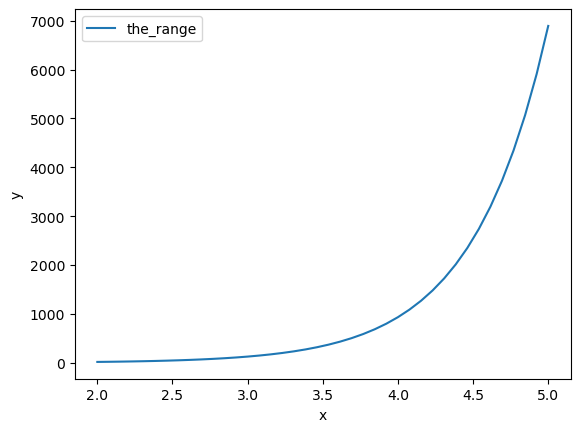

In [27]:
df.plot(x="the_domain", xlabel="x", ylabel="y");

In [55]:
def terms():
    n = 0
    while True:
        yield x**n/sp.factorial(n) * sp.bernoulli(n)
        n += 1

In [56]:
gen_coeffs = terms()

In [57]:
poly_coeffs = [next(gen_coeffs) for _ in range(17)]
poly_coeffs

[1,
 -x/2,
 x**2/12,
 0,
 -x**4/720,
 0,
 x**6/30240,
 0,
 -x**8/1209600,
 0,
 x**10/47900160,
 0,
 -691*x**12/1307674368000,
 0,
 x**14/74724249600,
 0,
 -3617*x**16/10670622842880000]

In [58]:
expr = sum(poly_coeffs)
expr

-3617*x**16/10670622842880000 + x**14/74724249600 - 691*x**12/1307674368000 + x**10/47900160 - x**8/1209600 + x**6/30240 - x**4/720 + x**2/12 - x/2 + 1

In [59]:
expr.subs(x, 1/3)

0.842575491052376

In [60]:
expr2 = x/(sp.E**x - 1)
expr2

x/(exp(x) - 1)

In [61]:
expr2.subs(x, 1/3)

0.842575491052376

In [62]:
expr.subs(x, 1).evalf()

0.581976706869318

In [63]:
expr2.subs(x, 1).evalf()

0.581976706869326